In [1]:

import os
import re
import numpy as np
import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt
import json
from result_parser import get_exp_result
from utils.distribution import distr_profile


#fig_width = 10
#plt.rcParams["figure.figsize"] = (fig_width, 6)
#plt.rcParams['font.size'] = 22



Bad key text.latex.preview in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba


=== cifar10 - cossim_zipf_vi1_r0 - shard10 - select100*0.1 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [55.04, 59.28, 58.89] -> max: 58.89
target_acc: 55.94550, 95% of bacc 

required epoch
[-1, 262, 273]
['-273.00x', '1.04x', '1.00x']
required time_simu
[-1, 1706.0, 1744.0]
['-1744.00x', '1.02x', '1.00x']

=== cifar10 - cossim_zipf_vi1_r1 - shard10 - select100*0.1 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [53.54, 58.04, 59.27] -> max: 58.04
target_acc: 55.13800, 95% of bacc 

required epoch
[-1, 287, 281]
['-287.00x', '1.00x', '1.02x']
required time_simu
[-1, 1929.0, 1859.0]
['-1929.00x', '1.00x', '1.04x']

=== cifar10 - cossim_zipf_vi1_r2 - shard10 - select100*0.1 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [56.5, 55.8, 57.53] -> max: 55.8
target_acc: 53.01000, 95% of bacc 

required epoch
[408, 305, 236]
['1.00x', '1.34x', '1.73x']
required time_simu
[2807.0, 2076.0, 1578.0

required time_simu
[-1, 2046.0, 1691.0]
['-2046.00x', '1.00x', '1.21x']

=== cifar10 - cossim_zipf_vi5_r0 - shard2 - select100*0.1 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [45.48, 55.75, 56.3] -> max: 55.75
target_acc: 52.96250, 95% of bacc 

required epoch
[-1, 316, 250]
['-316.00x', '1.00x', '1.26x']
required time_simu
[-1, 2062.0, 1638.0]
['-2062.00x', '1.00x', '1.26x']

=== cifar10 - cossim_zipf_vi5_r1 - shard2 - select100*0.1 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [47.54, 54.91, 56.16] -> max: 54.91
target_acc: 52.16450, 95% of bacc 

required epoch
[-1, 295, 248]
['-295.00x', '1.00x', '1.19x']
required time_simu
[-1, 1836.0, 1571.0]
['-1836.00x', '1.00x', '1.17x']

=== cifar10 - cossim_zipf_vi5_r2 - shard2 - select100*0.1 ===
algorithms
['fedavg', 'oort_e0.8', 'algo3_deg1_e0.8_wof100']

bacc summary: [45.4, 52.5, 53.55] -> max: 52.5
target_acc: 49.87500, 95% of bacc 

required epoch
[-1, 331, 214]
['-

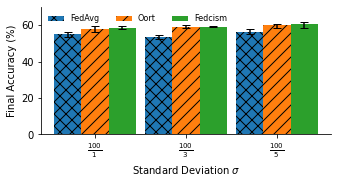

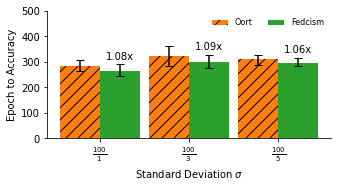

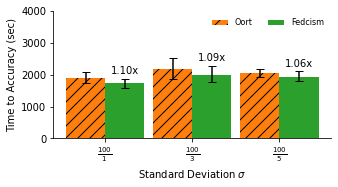

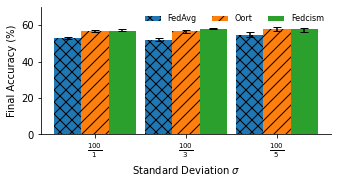

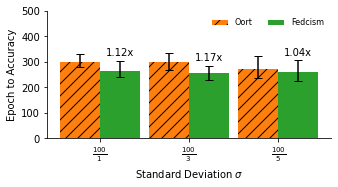

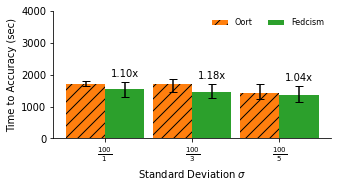

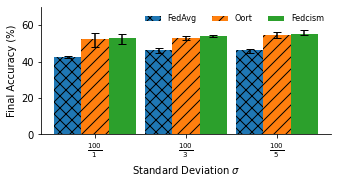

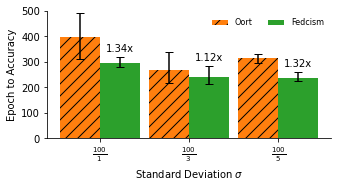

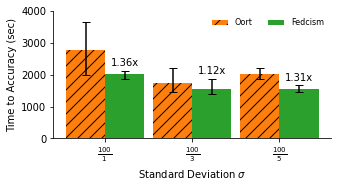

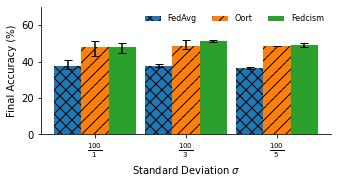

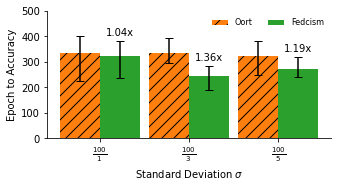

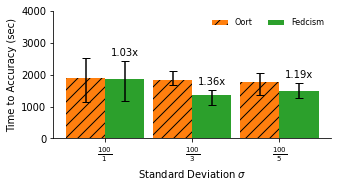

In [3]:
data_distr = 'zipf' # htail, cus
VI = 3
epoch = 500
fig_zoom = 0.3

# compare over datasets
acc_threshold = 95
#x_labels = [1, 3, 5]
x_labels = ['$\\frac{100}{1}$', '$\\frac{100}{3}$', '$\\frac{100}{5}$']
y_labels = ['Final Accuracy (%)',
            'Epoch to Accuracy',
            'Time to Accuracy (sec)']
y_lim = [70, epoch, 4000]
'''
y_labels = ['Final Accuracy(%)',
            'Epoch to Reach {}% Best Acc'.format(acc_threshold),
            'Time to Reach {}% Best Acc'.format(acc_threshold)]
'''
legends = {'fedavg':'FedAvg', 'oort_e0.8':'Oort', 'algo3_deg1_e0.8_wof100':'Fedcism'}
textures = ['xx', '//', None]

for dataset in ['cifar10']:
    for shard_per_user in [10, 2]:
        for frac in [0.1, 0.05]:
            # new fig set
            metrics = {'ACC':[], 'ETA':[], 'TTA':[]}
            
            for VI in [1, 3, 5]:
                bacc_stack = []
                TTAe_stack = []
                TTAt_stack = []

                for RUN in range(3):

                    data_distr_file = '{}_dict_users_vi{}_r{}.pkl'.format(data_distr, VI, RUN)
                    result_folder = 'cossim_{}_vi{}_r{}'.format(data_distr, VI, RUN)

                    algos, color_algos, bacc_algos, required_time,_ = get_exp_result(
                    dataset, data_distr, VI, RUN, data_distr_file, result_folder, legends,
                    shard_per_user, frac, acc_threshold, show_fig=False, save=False)
                    
                    bacc_stack.append(bacc_algos)
                    TTAe_stack.append(required_time['epoch'])
                    TTAt_stack.append(required_time['time_simu'])

                metrics['ACC'].append(bacc_stack)
                metrics['ETA'].append(TTAe_stack)
                metrics['TTA'].append(TTAt_stack)
    
            # summary 
            x = np.arange(len(x_labels))
            for i, (k, v) in enumerate(metrics.items()):
                fig, ax = plt.subplots(figsize=(16*fig_zoom, 9*fig_zoom))
                if data_distr == 'cus': # alias
                    fig_name = '{}_{}_xvi_s{}_c{}'.format(k, 'sparsez', shard_per_user, frac)
                else:            
                    fig_name = '{}_{}_xvi_s{}_c{}'.format(k, data_distr, shard_per_user, frac)
                fig_dir = os.path.join('save', dataset, 'fig', 'sigma_ver')
                
                fig_path = os.path.join(fig_dir, fig_name)
                
                #plt.title(fig_name, y=1.1)
                
                cur_algos = algos
                cur_v_T = v_T = np.array(v).T
                if 'TA' in k:
                    cur_algos = algos[1:]
                    cur_v_T = v_T[1:] # [algo][run][data_config]
                for aidx, algo in enumerate(cur_algos):
                    w = 0.9/len(cur_algos)
                    y_avg = cur_v_T[aidx].mean(axis=0)
                    y_max = cur_v_T[aidx].max(axis=0)
                    y_min = cur_v_T[aidx].min(axis=0)
                    y_err = np.vstack((y_max-y_avg, y_avg-y_min))

                    if k == 'ACC':
                        p = ax.bar(x+aidx*w-0.45+w/2, y_avg, yerr=y_err, 
                                    label=legends[algo], width=w,
                                    capsize=4, hatch=textures[aidx])
                    else:
                        p = ax.bar(x+aidx*w-0.45+w/2, y_avg, yerr=y_err, 
                                    label=legends[algo], width=w, color=color_algos[aidx+1],
                                    capsize=4, hatch=textures[aidx+1])

                        if aidx == 0:
                            base_yavg = y_avg
                        elif aidx == 1:
                            txt = ['{:.2f}x'.format(x) for x in base_yavg/y_avg]
                            ax.bar_label(p, labels=txt, padding=3)

                ax.set_ylabel(y_labels[i])
                ax.set_xlabel('Standard Deviation $\\sigma$')
                ax.set_ylim(top=y_lim[i])
                ax.set_xticks(x, labels=x_labels)#, rotation='vertical')
                #fig.legend(fancybox=True, shadow=True, fontsize=16,
                #                      loc='lower left', bbox_to_anchor=(1, 0))
                ax.legend(fontsize=8, ncol=len(cur_algos), frameon=False)

                # Hide the right and top spines
                ax.spines['right'].set_visible(False)
                ax.spines['top'].set_visible(False)

                fig.tight_layout()
                fig.savefig('{}.{}'.format(fig_path, 'png'), format='png', transparent=True)
                fig.savefig('{}.{}'.format(fig_path, 'eps'), format='eps', transparent=True)